# Simulation of Brownian motion and related processes

### Import the required packages

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy import stats
import BM_simulators as BM
import stochastic_plots as stoch
import matplotlib.pyplot as plt

### Arithmetic Brownian motion

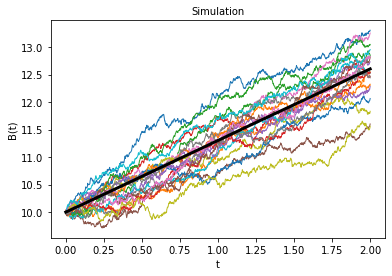

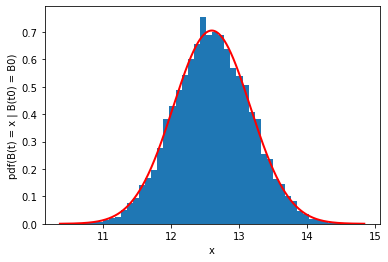

In [2]:
# Conditions for the simulation
M = 10000   # Number of trajectories
N = 1000  # Number of time steps
T = 2.0  # length of simulation interval
mu, sigma = 1.3, 0.4 # Parameters of the process


## Arithmetic BM
   
# Define initial conditions
t0, B0 = 0.0, 10.0

# Simulate and plot trajectories
t,B = BM.simulate_arithmetic_BM(t0, B0, T, mu, sigma, M, N)
stoch.plot_trajectories(t,B, fig_num=1) 
_ = plt.ylabel('B(t)')

# Distribution at t0 + T
BT = B[:,-1]
def pdf(x): return stats.norm.pdf(x, B0 + mu*T, sigma*np.sqrt(T))
stoch.plot_pdf(BT, pdf, fig_num=2)
_ = plt.ylabel('pdf(B(t) = x | B(t0) = B0)')

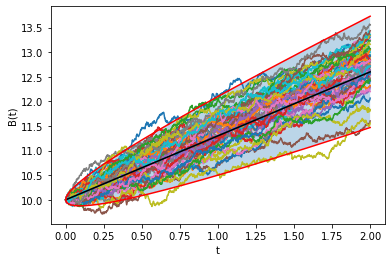

In [3]:
mean_B = np.mean(B, axis=0)
std_B = np.std(B, axis=0)

plt.plot(t, B[:50,:].T)
plt.plot(t, np.mean(B, axis = 0))
a = 2.0
_ = plt.fill_between(t, mean_B - a*std_B, mean_B + a*std_B, alpha=0.3)

expected_B = B0 + mu*t
std_B = sigma*np.sqrt(t)
plt.plot(t, expected_B, color='k')
plt.plot(t, expected_B - a*std_B, t, expected_B + a*std_B, color='r')
_ = plt.xlabel('t')
_ = plt.ylabel('B(t)')

### Brownian bridge

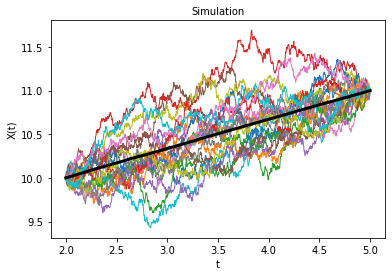

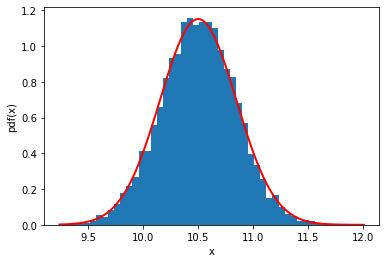

In [4]:
## Brownian bridge

# Conditions for the simulation
M = 10000   # Number of trajectories
N = 1000  # Number of time steps
T = 2.0  # length of simulation interval
sigma = 0.4 # Parametes of the process

# Define initial conditions
t0, B0 = 2.0, 10.0
t1, B1 = 5.0, 11.0

#  Simulate and plot trajectories
t, BB = BM.simulate_Brownian_bridge(t0, B0, t1, B1, sigma, M, N)
stoch.plot_trajectories(t,BB, fig_num=3) 


#  Distribution at an intermediate value in [t0, t0 + T]
in_index = np.int(N/2)
t_in = t[in_index]
BB_in = BB[:,in_index]
mu_in = B0 + (B1-B0)*(t_in-t0)/(t1-t0)
sigma_in = sigma*np.sqrt((t_in-t0)*(t1-t_in)/(t1-t0))
def pdf(x): return stats.norm.pdf(x, mu_in, sigma_in)
stoch.plot_pdf(BB_in, pdf, fig_num=4)

### Geometric Brownian motion

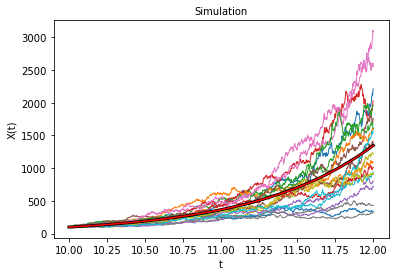

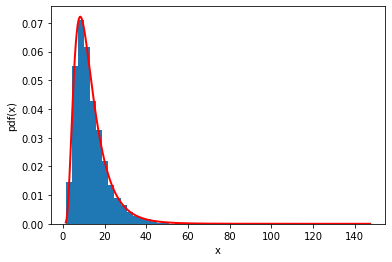

In [5]:
## Geometric BM
   
# Conditions for the simulation
M = 10000   # Number of trajectories
N = 1000  # Number of time steps
T = 2.0  # length of simulation interval

# Parameters of the process
mu, sigma = 1.3, 0.4 

# Define initial conditions
t0, S0 = 10.0, 100.0
t, S = BM.simulate_geometric_BM(t0, S0, T, mu, sigma, M, N)
stoch.plot_trajectories(t,S, fig_num=5)

# Plot exact mean
plt.plot(t, S0 * np.exp(mu * (t - t0)), color='r')

# Distribution of the distribution at t0 + T
ST = S[:, -1]
def pdf(x): return stats.lognorm.pdf(x, 
                           sigma*np.sqrt(T), 0.0, np.exp((mu-0.5*sigma**2)*T))
stoch.plot_pdf(ST/S0, pdf, fig_num=6)

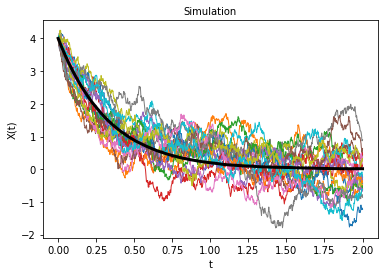

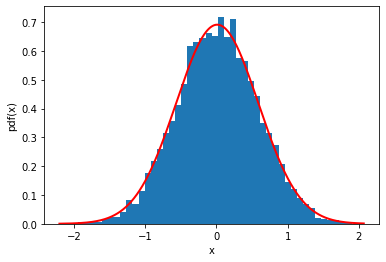

In [6]:
## Ornstein-Uhlenbeck process
   
# Conditions for the simulation
M = 10000   # Number of trajectories
N = 1000  # Number of time steps
T = 2.0  # length of simulation interval

k = 3.0  # Inverse correlation time
D = 1.0  # Diffusion constant
   
# Define initial conditions
t0, x0 = 0.0, 4.0

M = 10000   # Number of trajectories
N = 1000  # Number of time steps

# Simulate and plot trajectories
t, X = BM.simulate_Ornstein_Uhlenbeck(t0, x0, T, k, D, M, N)
stoch.plot_trajectories(t,X, fig_num=7) 

# Distribution at t0 + T
XT = X[:,-1]
m = x0*np.exp(-k*T)
s =   sigma = np.sqrt(D / k * (1.0 - np.exp(-2.0*k*T)))
def pdf(x): return stats.norm.pdf(x, m, s)
stoch.plot_pdf(XT, pdf, fig_num=8)